# Natural Language Processing - Assignment 01

#### Importing of Natural Language Toolkit
###### (installed the necessary modules : 'Punkt Tokenizer Models' using command --> nltk.download() in Python shell)

In [357]:
from nltk.tokenize import word_tokenize as wt, sent_tokenize as st
from collections import Counter
import numpy as np
import math
import matplotlib.pyplot as plt

#### Textual Data

In [358]:
file = open('tom.txt','r')

#### Variables initialization

In [359]:
tokens = 0
types_set = set()
list_all_words = []

In [360]:
for line in file:
    token_in_line = wt(line)
    tokens = tokens + len(token_in_line)
    types_set.update(token_in_line)      #updating the list of types line by line i.e. unique words
    list_all_words = list_all_words + token_in_line #updating list of all words in a file

#### Tokens, Types & TTR

In [361]:
types = len(types_set)
TTR = types/tokens
print('Tokens = ',tokens)
print('Types = ',types)
print('TTR = ',TTR)

Tokens =  90712
Types =  8580
TTR =  0.09458506041097099


#### Zipf's Law [f.r=k]

In [362]:
frequency = Counter(list_all_words)
frequency = dict(frequency.most_common())
freq = list(frequency.values())
ranks = list(range(1,types+1))

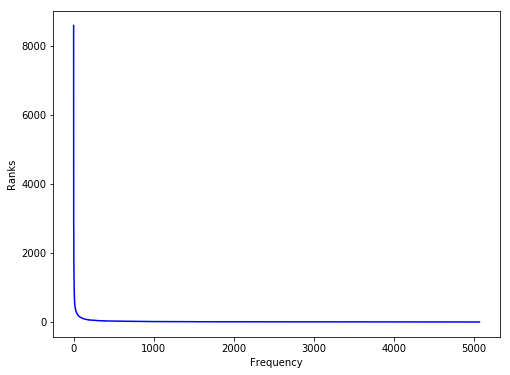

In [363]:
plt.figure(figsize=(8,6))
plt.plot(freq,ranks, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Ranks')
plt.show()

#### Zipf's Law [meaning is inversely proportional to sqrt(frequency)]

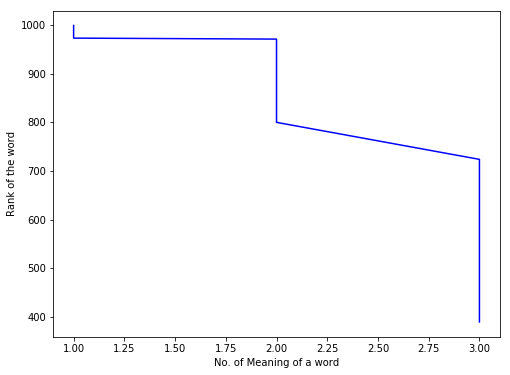

In [364]:
words = ['high','rose','lead','fair','point','bark','tear','family','please']
meaning = [3,3,3,2,2,2,2,1,1] 
rank_meaning = []
for word in words:
    rank_meaning.append(list(frequency.keys()).index(word)+1)
plt.figure(figsize=(8,6))
plt.plot(meaning,rank_meaning, color='blue')
plt.xlabel('No. of Meaning of a word')
plt.ylabel('Rank of the word')
plt.show()

#### Zipf's Law [length is directly proportional to rank]

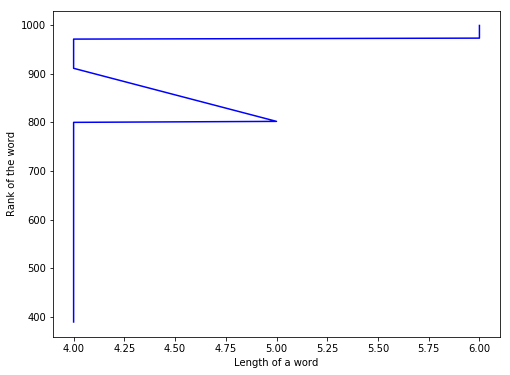

In [365]:
length = []  # length of the selcted words that are used for meaning list
for word in words:
    length.append(len(word))
plt.figure(figsize=(8,6))
plt.plot(length,rank_meaning, color='blue')
plt.xlabel('Length of a word')
plt.ylabel('Rank of the word')
plt.show()

#### HEAP's Law

In [366]:
data = (open('tom.txt','r')).read()
V = []
N = []
t_set = set()
sent_list = st(data)
previous_tokens = 0
for sentence in sent_list:
    current_tokens = wt(sentence)
    c = len(current_tokens) + previous_tokens
    N.append(c)
    previous_tokens = c
    t_set.update(current_tokens)
    V.append(len(t_set))

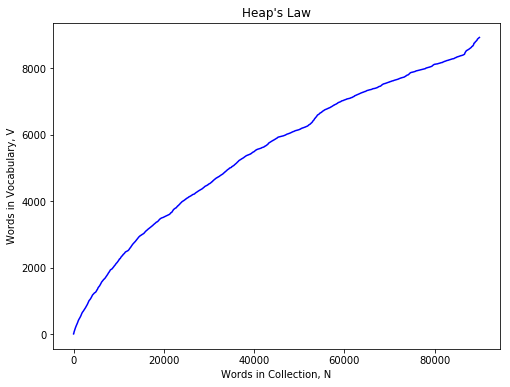

In [367]:
plt.figure(figsize=(8,6))
plt.plot(N,V, color='blue')
plt.xlabel('Words in Collection, N')
plt.ylabel('Words in Vocabulary, V')
plt.title("Heap's Law")
plt.show()

#### Estimating K and B

In [368]:
fit = np.polyfit(N, V,1)
K = math.log(fit[1],2)
B = math.sqrt(fit[0])
print("K : ",K)
print('B : ',B)

K :  10.672752502015936
B :  0.2929779508346827
